## MILESTONE 1

Name : Rahmat Fadhli Syauqi

Batch : 11

**Description:**
These are data that shows information of sales history in a supermarket.

## Assignment Objectives

*Milestones 1* ini dibuat guna mengevaluasi Pembelajaran Phase 0 sebagai berikut:

- Mampu melakukan hypothesis testing terhadap dataset yang diberikan.
- Mampu membuat dashboard interaktif terhadap dataset yang diberikan.
- Mampu mempresentasikan hasil visualisasi data dan temuan.

**Problem :**
1. Kota, Jenis pembayaran, & cabang tersibuk antara 3 kota?
2. Mengetahui jenis pembayaran paling favorit saat pembelajaan?
3. Produk paling favorit yang disukai berdasarkan kota & gender konsumen?
4. Mengetahui kota mana yang memiliki penjualan tertinggi?
5. Cara apa untuk meningkatkan sales?

## Import Library

In [38]:
!pip install plotly==5.7.0

In [39]:
#Library EDA
import pandas as pd
import numpy as np
from scipy import stats

#Library Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
plt.style.use('ggplot')

## Data loading 




In [40]:
#Import Dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [41]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dari dataframe information mengandung 1000 baris dan 17 kolom.

I think the datatype for each column is already in accordance with the column explanation above.

In [42]:
# Null value check for each column
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Tidak adanya missing value pada dataset ini.

Selanjutnya saya akan melakukan manipulasi penamaan kolom pada dataset, untuk mempermudah penulisan.

In [43]:
#Mengubah penamaan value dataset
df = df.rename(columns={ 'Customer type' : 'cust_type','Unit price' : 'unit_price', 
'Tax 5%' : 'tax_5%', 'Branch':'branch',
'gross income' : 'gross_income', 'Rating' : 'rating', 'Total' : 'total', 'Date':'date', 'Time':'time',
'Gender' :'gender', 'Product line' : 'product_line', 'Payment' :'payment', 'Quantity' : 'quantity'
})

In [44]:
#Converting type date
df['date']= pd.to_datetime(df['date'])
df["date2"] = df["date"].dt.strftime("%d-%m-%Y")

In [45]:
#Merubah penulisan waktu
df['time'] = df['time'].str.split(':', expand=True).get(0).astype('int64')

In [46]:
#Menampilkan dataset yang sudah diubah 
df.head(5)

,Invoice ID,branch,City,cust_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross margin percentage,gross_income,rating,date2
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,05-01-2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,08-03-2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,03-03-2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,27-01-2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,08-02-2019


Selanjutnya saya akan melakukan exporting data yang sudah dilakukan cleaning untuk mempermudah dalam pembuatan streamlit.

In [47]:
df.to_csv('cleanData.csv')

## Data Exploration

Pada bagian ini akan dilakukan proses eksplorasi data secara mendalam, kita akan menggali potensi dan mencari yang menarik dari dataset ini.

In [48]:
# Menampilkan value dari kolom tertentu

df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

Terdapat 3 kota pada bagian kolom 'City'

In [49]:
# Menampilkan value dari kolom tertentu

df['product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

Pada kolom jenis product, terdapat 6 jenis product yang dijual.

In [50]:
# Menampilkan value dari kolom tertentu

df['payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

Terdapat 3 jenis metode pembayaran pada supermarket ini

In [51]:
df[['unit_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,1000.0,55.67213,26.494628,10.08,32.875,55.23,77.935,99.96


Diatas merupakan statistika deksriptif dari kolom harga barang.

Sebelum lebih jauh, kita akan mencari tau berapa lama setiap kota/cabang dalam melakukan penjualan.

**Kota mana yang memiliki kesibukan dalam penjualan?**

In [52]:
#Membuat variabel quantity penjualan pada setiap kota
total_Q = df.groupby(['City','time'])['quantity'].sum()
total_Q= total_Q.groupby("time").mean().reset_index()
total_Q_sorted=total_Q.sort_values('quantity',ascending=False)

#menampilkan grafik pada kota dalam penjualan paling sibuk
busy_time_graph= px.histogram(df.sort_values("City"), x='time', y='quantity' ,color='City', barmode='group')
busy_time_graph.show()

print(f'Waktu paling sibuk pada {total_Q_sorted.values[0,0]} rata-rata  {total_Q_sorted.values[0,1] } item jumlah penjualan')


Waktu paling sibuk pada 19.0 rata-rata  216.33333333333334 item jumlah penjualan


Dari grafik diatas dapat kita ketahui bawah dari ketiga kota, waktu tersibuk dalam penjualan ada pada pukul 13:40 dengan rata-rata penjualan 22 item.

Yangon - 340
Naypyitow - 328
Mandalay - 332


c:\Users\TheSevenS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



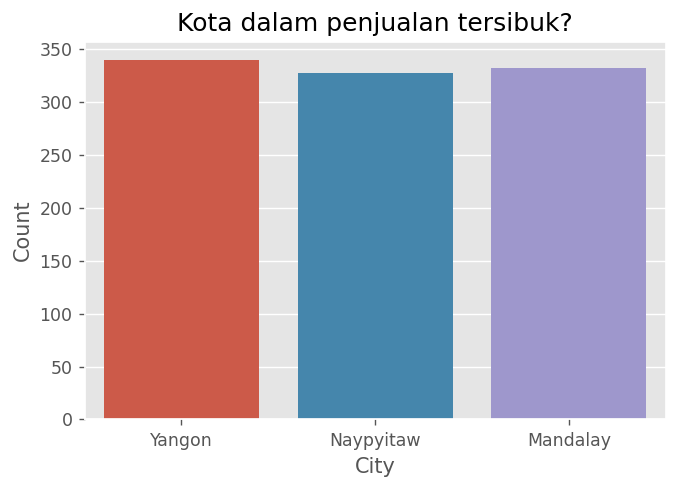

In [53]:
#Menampilkan graftik penjualan tersibuk antar Kota
plt.figure(dpi=125)
sns.countplot(df['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Kota dalam penjualan tersibuk?')
A,B,C =df.City.value_counts()

print('Yangon -',A)
print('Naypyitow -',C)
print('Mandalay -',B)
plt.show()

Dari grafik diatas ini terbukti untuk menguatkan bahwa kota Yangon merupakan kota tersibuk dalam penjualan diantara 2 kota lainnya.

Selanjutnya kita akan mengecek jenis pembayaran apa yang paling sering digunakan oleh pembeli dalam melakukan transaksi di supermarket ini.

**Jenis pembayaran apa yang paling digunakan oleh konsumen?**

Text(0.5, 1.0, 'Payment type favorit?')

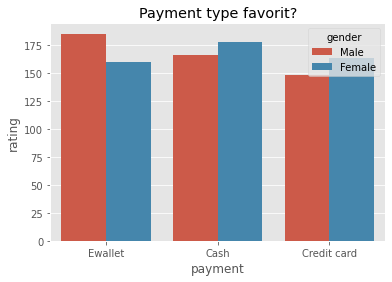

In [54]:
#Membuat grafik berdasarkan gender dan kepuasan konsumen
payment_satisfaction_gender = df[(df['gender'] == 'Male')|(df['gender'] == 'Female')].groupby(['payment','gender']).count()['rating'].sort_values(ascending=False).reset_index()
sns.barplot(x=payment_satisfaction_gender['payment'], y=payment_satisfaction_gender['rating'], orient='v', hue=payment_satisfaction_gender['gender'])
plt.title('Payment type favorit?')

Grafik diatas menunjukkan bahwa konsumen pria lebih senang menggunakan *Ewallet* dengan rating yang tinggi diantara jenis pembayaran lainnya. Sedangkan untuk konsumen wanita lebih menyukai jenis pembayaran cash dengan tingkat kepuasan paling tinggi diantara jenis pembayaran lainnya.

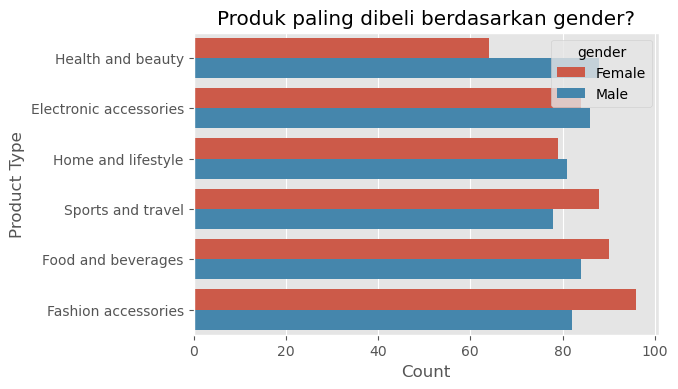

In [55]:
#Menampilkan grafik produk favorit berdasarkan gender
plt.figure(dpi=100)
sns.countplot(y ='product_line', hue = "gender", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Produk paling dibeli berdasarkan gender?')
plt.show()

Dari grafik diatas konsumen pria lebih menyukai membeli produk *Health & Beauty*  sedangkan konsumen wanita lebih menyukai membeli produk *Fashion accessories* dengan perbedaan yang sangat besar berbeda dengan tipe produk lainnya.

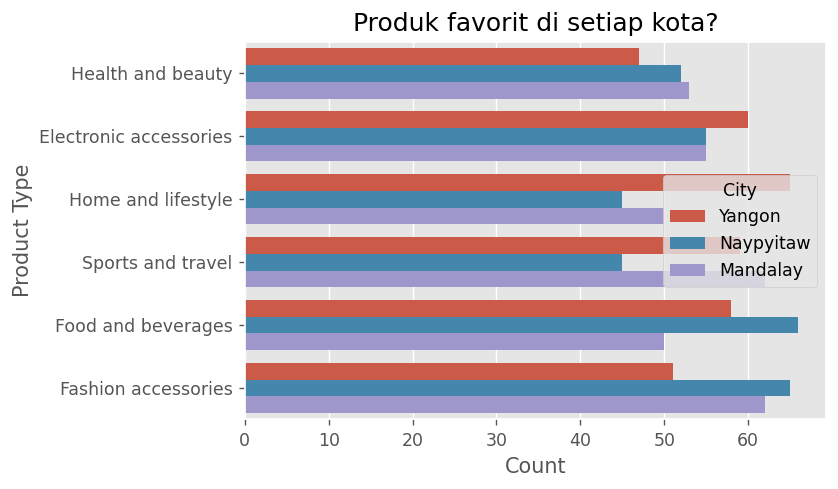

In [56]:
#Menampilkan kota mana yang memiliki produk favorit dalam penjualan
plt.figure(dpi=125)
sns.countplot(y ='product_line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Produk favorit di setiap kota?')
plt.show()

Pada akhirnya setiap kota memiliki traffic dari yang berbeda dari setiap product yang menjadi favorit dibeli oleh konsumen.
- Yangon memiliki produk penjualan favorit yaitu **Home & Lifestyle dan Electronic accesories**
- Naypyitaw produk favorit dalam penjualannya adalah **Food & beverages dan Fashion accessories**
- Mandalay dengan produk favorit yang banyak dibeli memimpin produk **Sports & Travel dan Health & Beauty**

**Kota & Produk apakah yang paling menguntungkan?**

Untuk mencari tahu produk yang paling menguntungkan untuk perusahaan ini, kita harus mencari tahu gross income dari setiap tipe produk.

In [57]:
#Menampilkan data dari 'City'
df_branch = df.groupby('City').count()
df_branch



,Invoice ID,branch,cust_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross margin percentage,gross_income,rating,date2
City,,,,,,,,,,,,,,,,,
Mandalay,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
Naypyitaw,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
Yangon,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340


In [58]:
#Menampilkan 'gross_income' dari setiap 'City'
profit_city = df.groupby('City')['gross_income'].sum().sort_values(ascending=False).reset_index()
profit_city

,City,gross_income
0,Naypyitaw,5265.1765
1,Yangon,5057.1605
2,Mandalay,5057.0320


In [59]:
#Menampilkan kota yang memiliki keuntungan terbesar
gross_income = df.groupby(['City'])['gross_income'].sum()
gross_income_max = gross_income.sort_values(ascending=False).reset_index()
print (f'Kota yang memiliki keuntungan terbesar: {gross_income_max.values[0,0]} by {gross_income_max.values[0,1]} keuntungan kotor')


Kota yang memiliki keuntungan terbesar: Naypyitaw by 5265.1765 keuntungan kotor


Setelah mengetahui kota mana yang memiliki keuntungan terbesar, selanjutnya kita akan melakukan analisa terhadap produk yang mendapatkan keuntungan terbesar dalam penjualan.

In [60]:
#Menampilkan gross_income dari setiap produk
profit_product = df.groupby('product_line')['gross_income'].sum().sort_values(ascending=False).reset_index()
profit_product


,product_line,gross_income
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


Dari hasil tabel diatas bahwa product Food & Beverages memiliki keuntungan paling besar diantara 5 product lainnya.

Berikut penggambaran grafik chart untuk produk yang paling menguntungkan dalam setiap kategori.

In [61]:
#Menampilkan grafik bar chart berdasarkan 'gross income' dari 'product_line'
most_profit_product_bar = df.groupby('product_line')['gross_income'].sum().reset_index()
px.bar( x=profit_product.product_line,y=profit_product.gross_income, color=profit_product.product_line )


In [62]:
#Kota paling produktif dalam penjualan

#Variabel waktu
A_time= (df[df['City']=='Naypyitaw'][['time','quantity']].groupby('time').sum())
B_time= (df[df['City']=='Yangon'][['time','quantity']].groupby('time').sum())
C_time= (df[df['City']=='Mandalay'][['time','quantity']].groupby('time').sum())
#Sampling per jumlah waktu kota
sample_A = A_time.reset_index() 
sample_B = B_time.reset_index() 
sample_C = C_time.reset_index() 
#Kuantitas penjualan setiap kota
maxA=sample_A[sample_A['quantity']==sample_A['quantity'].max()]
maxB=sample_B[sample_B['quantity'] == sample_B['quantity'].max()]
maxC=sample_C[sample_C['quantity'] == sample_C['quantity'].max()]
#Histogram
px.histogram(df.sort_values("City"), x='time', y='quantity' ,color='City', barmode='group')


In [63]:
print(f'Productivity hour in City Naypyitaw is : ', maxA.values[0,0], f'serving {maxA.values[0,1]} of quantity')
print(f'Productivity hour in City Yangon is : ',maxB.values[0,0], f'serving {maxB.values[0,1]} of quantity')
print(f'Productivity hour in City Mandalay is : ',maxC.values[0,0], f'serving {maxC.values[0,1]} of quantity')


Productivity hour in City Naypyitaw is :  19 serving 222 of quantity
Productivity hour in City Yangon is :  15 serving 193 of quantity
Productivity hour in City Mandalay is :  19 serving 255 of quantity


Dari hasil diatas kita dapat mengetahui kesibukan dalam penjualan setiap cabang kota, dinyatakan bahwa kota Naypyitaw merupakan kota dalam penjualan tersibuk dengan jumlah 19 pelayanan dalam total 222 item.

## Hypothesis Testing

Dalam pengujian hipotesis ini kita akan membuktikan kota mana yang memiliki keuntungan tertinggi berdasarkan  gross_income dan quantity penjualan dari keseluruhan product yang terjual.

In [64]:
#Menampilkan nilai mean berdasarkan gross_income setiap kota
Naypyitaw_profit= (df[df['City']=='Naypyitaw'][['gross_income','quantity']].groupby('gross_income').sum())   
Yangon_profit= (df[df['City']=='Yangon'][['gross_income','quantity']].groupby('gross_income').sum())
Mandalay_profit= (df[df['City']=='Mandalay'][['gross_income','quantity']].groupby('gross_income').sum())

print('Rata-rata keuntungan pada kota Naypyitaw : ', Naypyitaw_profit.quantity.mean())
print('Rata-rata keuntungan pada kota Yangon : ',Yangon_profit.quantity.mean())
print('Rata-rata keuntungan pada kota Mandalay : ',Mandalay_profit.quantity.mean())

Rata-rata keuntungan pada kota Naypyitaw :  5.599388379204893
Rata-rata keuntungan pada kota Yangon :  5.48377581120944
Rata-rata keuntungan pada kota Mandalay :  5.498489425981873


Pada akhirnya, Kota Yangon & kota Mandalay memiliki nilai yang hampir sama, selanjutnya akan melakukan Hypothesis notation.

**Hypothesis Notation**

- Null Hypothesis : Mean value of Yangon City is relatively the same as Mean value of Mandalay City
- Alt. Hypothesis : Mean value of Yangon City is significantly different with Mean value of Mandalay City


**Mathematical Notation**
- H0 : μ_Yangon = μ_Mandalay
- H1 : μ_Yangon != μ_Mandalay

In [65]:
#T-Test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Yangon_profit,Mandalay_profit)
print('P-value:',p_val)
print('T-stat:', t_stat)

P-value: [0.94759176]
T-stat: [-0.065756]


Dengan penggunaan Confidence Interval (0.05), nilai P lebih besar daripada critical value, dapat diasumsikan bahwa kita tidak memiliki bukti untuk menolak null hypothesis (H0) dengan menggunakan metode T-Test 2 sample 2 tailed.

c:\Users\TheSevenS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\TheSevenS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



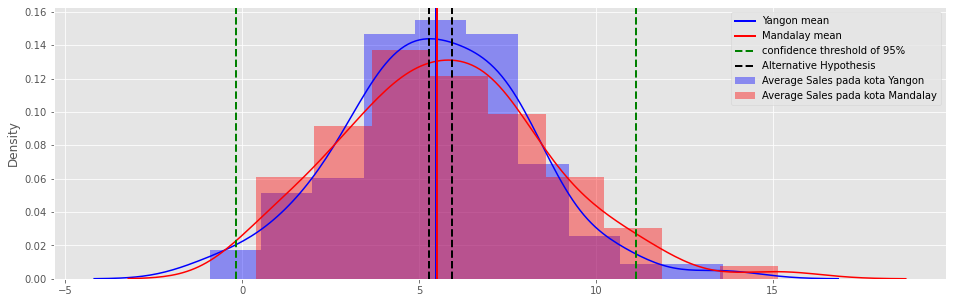

In [66]:
#Simulation
Yangon_sales = np.random.normal(Yangon_profit.quantity.mean(),Yangon_profit.quantity.std(),80)
Mandalay_sales = np.random.normal(Mandalay_profit.quantity.mean(),Mandalay_profit.quantity.std(),80)

#Confidence Interval
ci = stats.norm.interval(0.95, Yangon_profit.quantity.mean(), Yangon_profit.quantity.std())
#Plotting
plt.figure(figsize=(16,5))
sns.distplot(Yangon_sales, label='Average Sales pada kota Yangon',color='blue')
sns.distplot(Mandalay_sales, label='Average Sales pada kota Mandalay',color='red')
#Mean
plt.axvline(Yangon_profit.quantity.mean(), color='blue', linewidth=2, label='Yangon mean')
plt.axvline(Mandalay_profit.quantity.mean(), color='red',  linewidth=2, label='Mandalay mean')
#Line
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Yangon_sales.mean()+t_stat[0]*Yangon_sales.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Mandalay_sales.mean()-t_stat[0]*Mandalay_sales.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Alternative Hypothesis (H1) dengan garis hitam yang berada di dalam Confidence Interval mengartikan bahwa Hypothesis gagal untuk menolak Null Hypothesis (H0), dapat dikatakan bahwa kota Yangon dan kota Mandalay memiliki nilai penjualan yang hampir sama pada setiap jumlah penjualan product, walaupun dapat dilihat bahwa kota Yangon lebih memiliki sedikit rata-rata penjualan tapi tidak berbeda secara signifikan.

## Conclusions & Analysist

**Conclusions**

1. Semua penjualan dari 3 kota memiliki waktu tersibuk pada pukul 13:40 dengan rata-rata penjualan 22 item.
2. Kota Yangon merupakan kota yang tersibuk dalam penjualan diantara 2 kota lainnya
3. Pembayaran paling favorit dengan tingkat kepuasan tertinggi untuk konsumen laki-laki adalah Ewallet, sedangkan untuk wanita Cash Payment
4. Produk paling banyak dibeli di kota Yangon adalah Home & Lifestyle serta Electronic Accessories, sedangkan untuk kota Mandalay produk penjualan tertinggi Sports & Travel dengan Health & Beauty.
5. Penjualan tertinggi dari keseluruhan yaitu berada pada kota Naypyitaw dan produk dengan gross income tertinggi pada Food & Beverages.



## Analysist

Untuk pengembangan sales, kota Naypyitaw memiliki pendapatan tertinggi dikarenakan produk yang memiliki gross income tertinggi adalah Food & Beverages yang penjualannya berada di kota Naypyitaw, dengan kata lain kota lainnya seperti Yangon & Mandalay juga memiliki product dengan penjualannya tertinggi masing-masing, sehingga pemaksimalan quantity product dari setiap kota harus dimaksimalkan. Dari hal ini kita dapat berupaya memaksimalkan penjualan dalam promosi jenis product lainnya yang memiliki harga tinggi untuk mendapatkan keuntungan lebih besar.
Edukasi sistem pembayaran juga harus dijalankan agar lebih mempermudah pelayanan saat pembayaran konsumen.

**Heroku Link**

link = ('https://stats-ml1.herokuapp.com/')